<a href="https://colab.research.google.com/github/kiranmali1992/Machine-Learning/blob/main/K_mean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing requried module
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Mall_Customers.csv")

In [ ]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


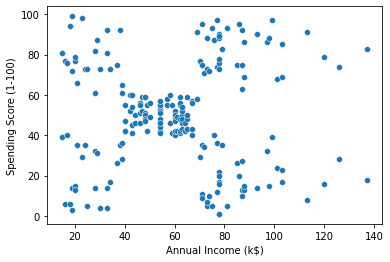

In [ ]:
sns.scatterplot(x ="Annual Income (k$)",y ="Spending Score (1-100)" ,data= data)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


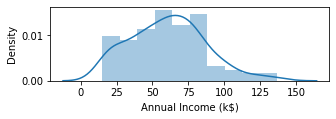

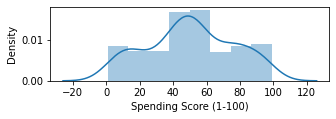

In [ ]:
plt.figure(figsize= (5,3))
plt.subplot(2,1,1)
sns.distplot(data["Annual Income (k$)"])

plt.figure(figsize= (5,3))
plt.subplot(2,1,2)
sns.distplot(data["Spending Score (1-100)"])

In [ ]:
#Finding missing value in dataset
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

**Removing outlier from dataset finding z score**

In [ ]:
#finding maximum limit above this limit is consider an outlier
max_thresh = data["Spending Score (1-100)"].mean() + 3 * data["Spending Score (1-100)"].std() 
max_thresh

127.67056500511049

In [ ]:
#Finding minimum limit belowe this is consider as outlier
min_thresh = data["Spending Score (1-100)"].mean() - 3 * data["Spending Score (1-100)"].std() 
min_thresh

-27.270565005110484

In [ ]:
data[(data["Spending Score (1-100)"] < max_thresh) & (data["Spending Score (1-100)"] > min_thresh) ]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# **Normalization**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
data.iloc[:,3:] = MMS.fit_transform(data.iloc[:,3:])


In [ ]:
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,0.000000,0.387755
1,2,Male,21,0.000000,0.816327
2,3,Female,20,0.008197,0.051020
3,4,Female,23,0.008197,0.775510
4,5,Female,31,0.016393,0.397959
...,...,...,...,...,...
195,196,Female,35,0.860656,0.795918
196,197,Female,45,0.909836,0.275510
197,198,Male,32,0.909836,0.744898
198,199,Male,32,1.000000,0.173469


In [ ]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters= 5)
km.fit(data.iloc[:,3:])

KMeans(n_clusters=5)

In [ ]:
y_pred = km.predict(data.iloc[:,3:])
y_pred

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
data["No_cluster"] = y_pred

In [ ]:
data.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),No_cluster
0,1,Male,19,0.000000,0.387755,4
1,2,Male,21,0.000000,0.816327,3
2,3,Female,20,0.008197,0.051020,4
3,4,Female,23,0.008197,0.775510,3
4,5,Female,31,0.016393,0.397959,4
5,6,Female,22,0.016393,0.765306,3
6,7,Female,35,0.024590,0.051020,4
7,8,Female,23,0.024590,0.948980,3
8,9,Male,64,0.032787,0.020408,4
9,10,Female,30,0.032787,0.724490,3


In [ ]:
#Sperating data into five diferent grouph
cluster_group1 = data[data["No_cluster"] == 0]
cluster_group2 = data[data["No_cluster"] == 1]
cluster_group3 = data[data["No_cluster"] == 2]
cluster_group4 = data[data["No_cluster"] == 3]
cluster_group5 = data[data["No_cluster"] == 4]


**Centroid**

In [ ]:
km.cluster_centers_

array([[0.33029751, 0.49508692],
       [0.58638083, 0.82783883],
       [0.6       , 0.16443149],
       [0.08792846, 0.79962894],
       [0.09265859, 0.20319432]])

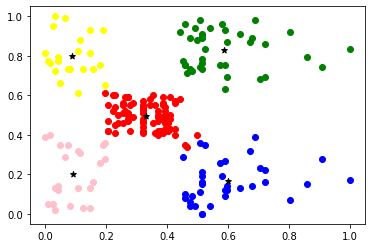

In [ ]:
#Plotting the graph
plt.scatter(cluster_group1["Annual Income (k$)"],cluster_group1["Spending Score (1-100)"],color= "red")
plt.scatter(cluster_group2["Annual Income (k$)"],cluster_group2["Spending Score (1-100)"],color= "green")
plt.scatter(cluster_group3["Annual Income (k$)"],cluster_group3["Spending Score (1-100)"],color= "blue")
plt.scatter(cluster_group4["Annual Income (k$)"],cluster_group4["Spending Score (1-100)"],color= "yellow")
plt.scatter(cluster_group5["Annual Income (k$)"],cluster_group5["Spending Score (1-100)"],color= "pink")
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color = 'black',marker='*')


**Elbow Plot**

In [ ]:
mylist = []
k_range = range(1,10)
for k in k_range:
  km = KMeans(n_clusters= k)
  km.fit(data.iloc[:,3:])
  mylist.append(km.inertia_)


In [ ]:
mylist

[411.59572032603995,
 102.01189735584137,
 45.3954477200925,
 18.82784802939479,
 3.5831179059525606,
 3.1003435707513756,
 2.6307516010593215,
 2.340255312289252,
 1.9547710478671183]

Text(5, 30, 'Optimal value')

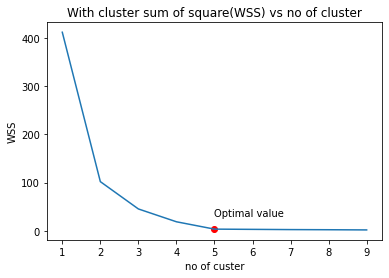

In [ ]:
from matplotlib.patches import FancyBboxPatch
plt.plot(k_range,mylist)
plt.title("With cluster sum of square(WSS) vs no of cluster")
plt.xlabel("no of custer")
plt.ylabel("WSS")
plt.scatter(5,4,color = "red")
plt.text(5,30,"Optimal value")
